In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('titanic.csv')

In [4]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
"""
1. Total missing values                   sum(df.isnull().sum())  Note: notnull() is opposite of isnull()
2. Column wise missing values             df.isnull().sum() 
3. Column wise missing values in %        round(100*df.isnull().sum()/len(df),2)
4. Row wise missing values                df.isnull().sum(axis=1) # Row wise Null values
5. Row wise missing values in %           round(100*df.isnull().sum(axis=1)/df.shape[1],2)
6. Rows with more than x% missing values  sum(round(100*df.isna().sum(axis=1)/df.shape[1],2) >50)
7. Column with more than x% values        sum(round(100*df.isnull().sum()/len(df),2) > 10)
7.1 Rows having any null value            sum(df.isnull().any(axis=1))
7.2 Rows having all null value            sum(df.isnull().all(axis=1)) 
7.3 Columns having any null value         sum(df.isnull().any(axis=0))
7.4 Columns having all null valuec        sum(df.isnull().all(axis=0)) 
8. Graphical Representation of missing values   sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
9. Handling missing values
   a) Deleting the rows having more than x% nulls   test5.dropna(thresh=test5.shape[1]*0.26,how='all',axis=0),# Delete all rows having >=74% Nulls
   b) Deleting the cols having more that x% nulls   test5.dropna(thresh=test5.shape[1]*0.26,how='all',axis=0)
   c) Statastics fillers
      i) Mean                      test1.Age = test1.Age.fillna(test1.Age.dropna().mean())
      ii) Mode                     test1.Age = test1.Age.fillna(test1.Age.dropna().mode())
      iii) Median                  test1.Age = test1.Age.fillna(test1.Age.dropna().median())
      iv) External Filler Value    test1.Age = test1.Age.fillna(15)
   d) Making a Model to predict values  Splitting + Making Model
"""

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [45]:
sum(df.isnull().sum()) # Total Missing Values

866

In [13]:
df.isnull().sum()  #column wise null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [24]:
round(100*df.isnull().sum()/len(df),2) # Column wise missing nulls with %

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

In [31]:
df.isna().sum(axis=1) # Row wise Null values

0      1
1      0
2      1
3      0
4      1
      ..
886    1
887    0
888    2
889    0
890    1
Length: 891, dtype: int64

In [34]:
round(100*df.isna().sum(axis=1)/df.shape[1],2) # Rows with null values %wise

0       8.33
1       0.00
2       8.33
3       0.00
4       8.33
       ...  
886     8.33
887     0.00
888    16.67
889     0.00
890     8.33
Length: 891, dtype: float64

In [43]:
sum(round(100*df.isnull().sum()/len(df),2) > 10)

2

In [74]:
sum(round(100*df.isna().sum(axis=1)/df.shape[1],2) >10)

0

In [48]:
sum(df.isnull().any(axis=0)) # No of cols having nulls

3

In [49]:
sum(df.isnull().any(axis=1)) # No.of rows having nulls

708

In [50]:
sum(df.isnull().all(axis=0)) # No of cols having all nulls

0

In [52]:
sum(df.isnull().all(axis=1)) # No.of rows having all null values

0

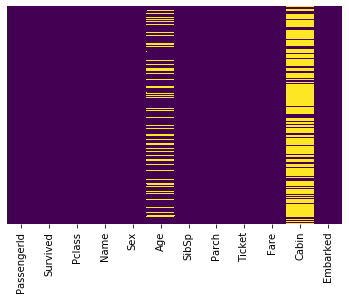

In [53]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [71]:
test1 = df
test2 = df
test3 = df
test4 = df
test5 = df

In [72]:
test1.Age = test1.Age.fillna(15) # Replacing with External Value 
test2.Age = test1.Age.fillna(test1.Age.dropna().median()) # Replacing with Median Value 
test3.Age = test1.Age.fillna(test1.Age.dropna().mean()) # Replacing with Mean Value 
test1.Age = test1.Age.fillna(test1.Age.dropna().mode()) # Replacing with Mode Value 

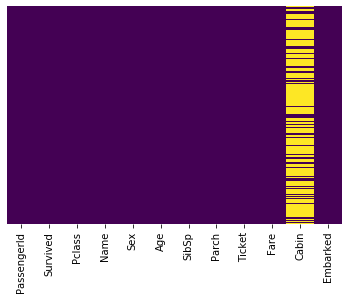

In [70]:
sns.heatmap(test4.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [75]:
data = {
    'c1': ['Test1','Test2','NULL','Test3',' ','Test4','Test4','Test1',"Test3"],
    'c2': [' ','Test1',' ','NULL',' ','NULL','NULL','NULL','NULL'],
    'c3': [0,0,0,0,0,1,5,0,0],
    'c4': ['NULL', 'Test2', 'Test1','Test1', 'Test2', 'Test2','Test1','Test1','Test2']
}
df = pd.DataFrame(data)

In [76]:
df

,c1,c2,c3,c4
0,Test1,,0,NULL
1,Test2,Test1,0,Test2
2,NULL,,0,Test1
3,Test3,NULL,0,Test1
4,,,0,Test2
5,Test4,NULL,1,Test2
6,Test4,NULL,5,Test1
7,Test1,NULL,0,Test1
8,Test3,NULL,0,Test2


In [83]:
df = df.replace([0,' ','NULL'],np.nan)
test5 = df
df

,c1,c2,c3,c4
0,Test1,NaN,NaN,NaN
1,Test2,Test1,NaN,Test2
2,NaN,NaN,NaN,Test1
3,Test3,NaN,NaN,Test1
4,NaN,NaN,NaN,Test2
5,Test4,NaN,1.0,Test2
6,Test4,NaN,5.0,Test1
7,Test1,NaN,NaN,Test1
8,Test3,NaN,NaN,Test2


In [86]:
test5.dropna(thresh=test5.shape[0]*0.26,how='all',axis=1) # delete cols having more than 70% nulls

,c1,c4
0,Test1,NaN
1,Test2,Test2
2,NaN,Test1
3,Test3,Test1
4,NaN,Test2
5,Test4,Test2
6,Test4,Test1
7,Test1,Test1
8,Test3,Test2


In [91]:
test5.dropna(thresh=test5.shape[1]*0.26,how='all',axis=0) # Delete all rows having >=74% Nulls

,c1,c2,c3,c4
1,Test2,Test1,NaN,Test2
3,Test3,NaN,NaN,Test1
5,Test4,NaN,1.0,Test2
6,Test4,NaN,5.0,Test1
7,Test1,NaN,NaN,Test1
8,Test3,NaN,NaN,Test2
